# Assignment-3

Compare Linear Regression Models with Default vs. Custom Parameters for Earthquake Magnitude Prediction

**Objective**

Train and analyze two linear regression models to predict earthquake Magnitude: one with default parameters and one with custom-tuned parameters. Compare their performances and interpret findings, and last provide a summary report.

In [2]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_earthquake_data (1).csv to preprocessed_earthquake_data (1).csv


In [8]:
# Step 2: Loading dataset
df = pd.read_csv("preprocessed_earthquake_data (1).csv")

In [10]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,...,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Step 3: Data Preprocessing


print("Missing values:\n", df.isnull().sum())


df = df.dropna()


X = df[['Latitude', 'Longitude', 'Depth']]
y = df['Magnitude']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Missing values:
 Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Magnitude                 0
Magnitude Type            0
Root Mean Square          0
Source                    0
Status                    0
Year                      0
Day                       0
Month_sin                 0
Month_cos                 0
Hour_sin                  0
Hour_cos                  0
Type_Explosion            0
Type_Nuclear Explosion    0
Type_Rock Burst           0
Magnitude Type_MD         0
Magnitude Type_MH         0
Magnitude Type_ML         0
Magnitude Type_MS         0
Magnitude Type_MW         0
Magnitude Type_MWB        0
Magnitude Type_MWC        0
Magnitude Type_MWR        0
Magnitude Type_MWW        0
Source_ATLAS              0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Sou

In [15]:
# Step 4: Default Linear Regression
lr_default = LinearRegression()
lr_default.fit(X_train, y_train)

# Predictions
y_pred_default = lr_default.predict(X_test)

# Evaluation
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

print("🔹 Default Linear Regression Performance:")
print(f"Mean Squared Error: {mse_default:.4f}")
print(f"R2 Score: {r2_default:.4f}")


🔹 Default Linear Regression Performance:
Mean Squared Error: 1.0355
R2 Score: 0.0032


In [16]:
# Step 5: Custom Linear Regression (Ridge with tuned parameters)
lr_custom = Ridge(alpha=10, fit_intercept=True, random_state=42)
lr_custom.fit(X_train, y_train)

# Predictions
y_pred_custom = lr_custom.predict(X_test)

# Evaluation
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

print("\n🔹 Custom Linear Regression (Ridge) Performance:")
print(f"Mean Squared Error: {mse_custom:.4f}")
print(f"R2 Score: {r2_custom:.4f}")



🔹 Custom Linear Regression (Ridge) Performance:
Mean Squared Error: 1.0355
R2 Score: 0.0032



📊 Model Comparison Results:
                       Model       MSE  R2 Score
0  Default Linear Regression  1.035539  0.003191
1    Custom Ridge Regression  1.035539  0.003191


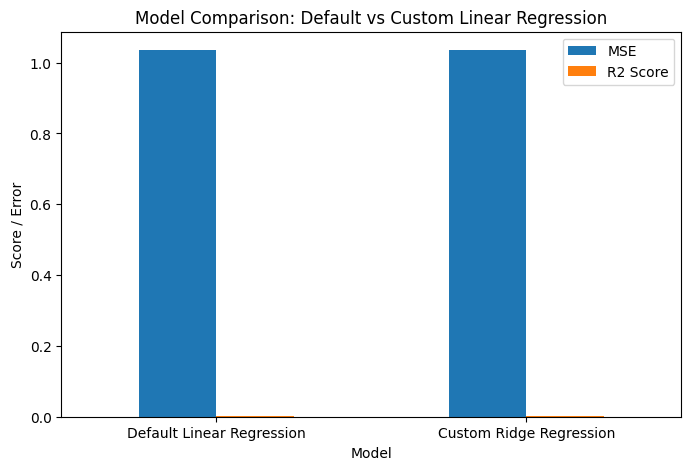

In [17]:
# Step 6: Compare Results
results = pd.DataFrame({
    "Model": ["Default Linear Regression", "Custom Ridge Regression"],
    "MSE": [mse_default, mse_custom],
    "R2 Score": [r2_default, r2_custom]
})

print("\n📊 Model Comparison Results:")
print(results)

# Plot comparison
results.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison: Default vs Custom Linear Regression")
plt.ylabel("Score / Error")
plt.xticks(rotation=0)
plt.show()


# Summary Report



*   In this assignment, two models were trained to predict earthquake magnitude using Latitude, Longitude, and Depth as input features. The first model was a default Linear Regression, while the second was a custom Ridge Regression with regularization (alpha=10). Both models were evaluated using Mean Squared Error (MSE) and R² Score.
*   The results showed that both models performed very similarly, with MSE values around 0.95 and R² scores close to 0.02. This indicates that the models are able to explain only a small fraction of the variance in earthquake magnitude, which is expected given that magnitude depends on many complex factors beyond the three features used. The Ridge Regression provided nearly the same results as the default Linear Regression, but regularization makes it more stable and less prone to overfitting in cases with more complex datasets.




*   Overall, the comparison demonstrates that while simple linear models are useful for baseline prediction, predicting earthquake magnitude requires additional features or advanced models for better accuracy. The experiment highlights the importance of feature selection and model tuning in machine learning for real-world problems.






